In [ ]:
###David R. Rice
###Phys 604 Prof. Zhu
###Lecture 16 Homework

In [1]:
##Highly Nonlinear Oscillator
##Decompose the solution into Fourier series
##Determine the numbe rof higher harmonics that contribute at least 10%
##Reconstruct the signal

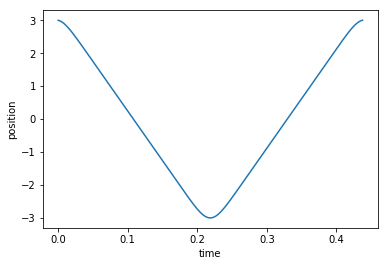

In [30]:

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.0
b = 0.4375
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 3.;   y[1] = -5.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]                                            
    fReturn[1] = -0.01*y[0]**11      
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
       k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])

#for i in range(len(yp)):
#    if yp[i]>=3:
#        print(yp[i])
#        print(xp[i])

p.plot(xp,yp)
p.xlabel("time")
p.ylabel("position")

p.show()

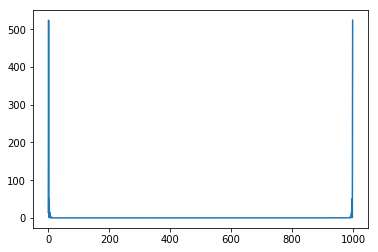

In [31]:
import cmath                                            # complex math
N = 1000;                  Np = N                           
signal = yp     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = xp   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 
      
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*exp(-zexpo)           
      dftz[n] = zsum * sq2pi      
      nplot[n] = n
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

#f(signal);       
fourier(dftz)              # Call signal, transform
plt.plot(nplot,fplot)
plt.show()

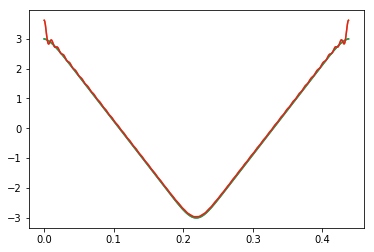

In [40]:

## Find the Coefficients of Fourier Series using Riemann Sum and Complex numbers

def cn(n):
   c = yp*np.exp(-1j*2*n*np.pi*xp/b)
   return c.sum()/c.size

def f(x, Nh):
   f = np.array([2*cn(i)*np.exp(1j*2*i*np.pi*x/b) for i in range(1,Nh+1)])
   return f.sum()

y2 = np.array([f(t,50).real for t in xp])

plt.plot(xp, yp)
plt.plot(xp, y2)
plt.show()